In [9]:
df = pd.read_csv(r"C:\Users\sumol\Downloads\house_price.csv")


In [13]:
import pandas as pd

# Option A: If the file is in the same folder as your notebook
df = pd.read_csv("house_price.csv")

# Option B: If the file is in Downloads or another folder, provide full path
df = pd.read_csv(r"C:\Users\sumol\Downloads\house_price.csv")

# Preview the data
df.head()



,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [17]:
for col in df.columns:
    print(f"{col}:\nUnique Values: {df[col].unique()}\nCount: {df[col].nunique()}\n")


Company:
Unique Values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Count: 6

Age:
Unique Values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Count: 29

Salary:
Unique Values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Count: 40

Place:
Unique Values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Count: 11

Country:
Unique Values: ['India']
Count: 1

Gender:
Unique Values: [0 1]
Count: 2



In [19]:
df.describe(include='all')  # Includes numeric and non-numeric columns


,Company,Age,Salary,Place,Country,Gender
count,140,130.000000,124.000000,134,148,148.000000
unique,6,NaN,NaN,11,1,NaN
top,TCS,NaN,NaN,Mumbai,India,NaN
freq,53,NaN,NaN,37,148,NaN
mean,NaN,30.484615,5312.467742,NaN,NaN,0.222973
std,NaN,11.096640,2573.764683,NaN,NaN,0.417654
min,NaN,0.000000,1089.000000,NaN,NaN,0.000000
25%,NaN,22.000000,3030.000000,NaN,NaN,0.000000
50%,NaN,32.500000,5000.000000,NaN,NaN,0.000000
75%,NaN,37.750000,8000.000000,NaN,NaN,0.000000


In [21]:
df.rename(columns={
    'old_col_name1': 'new_name1',
    'old_col_name2': 'new_name2',
    # Add more if necessary
}, inplace=True)


In [23]:
df.isnull().sum()  # Show missing values per column


Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [25]:
df.drop_duplicates(inplace=True)


In [29]:
import pandas as pd

df['Age'] = df['Age'].replace(0, pd.NA)


In [31]:
df.fillna(df.median(numeric_only=True), inplace=True)  # Replace with median


In [37]:
print(df.columns.tolist())


['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender']


In [39]:
['Age ', ' Salary', 'Place']


['Age ', ' Salary', 'Place']

In [41]:
df.columns = df.columns.str.strip().str.lower()


In [43]:
['age', 'salary', 'place']


['age', 'salary', 'place']

In [45]:
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['salary'] < lower_bound) | (df['salary'] > upper_bound)]
print(outliers)


Empty DataFrame
Columns: [company, age, salary, place, country, gender]
Index: []


In [47]:
filtered_df = df[(df['age'] > 40) & (df['salary'] < 5000)]
filtered_df


,company,age,salary,place,country,gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


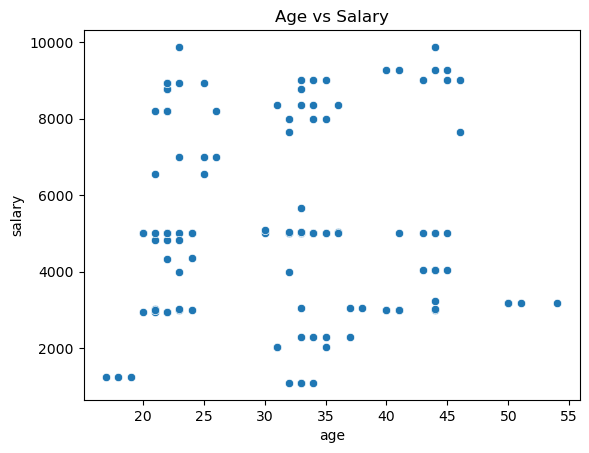

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, x='age', y='salary')
plt.title('Age vs Salary')
plt.show()


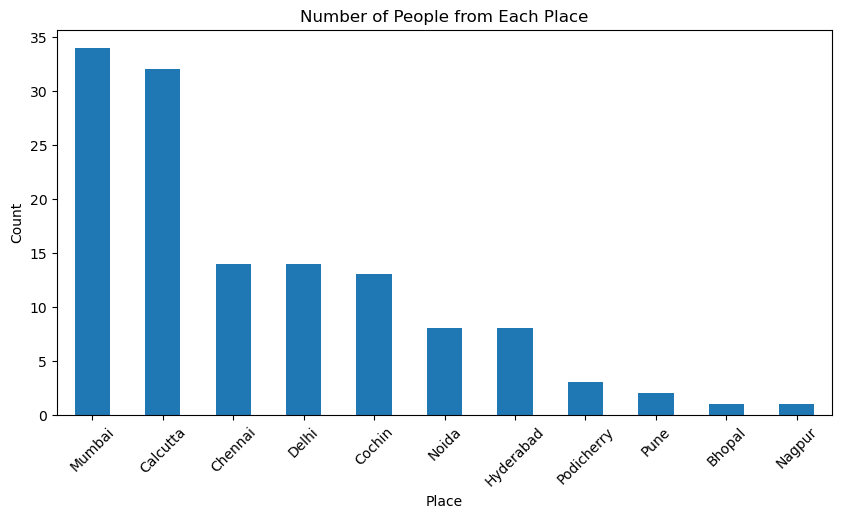

In [51]:
place_counts = df['place'].value_counts()

place_counts.plot(kind='bar', figsize=(10, 5))
plt.title('Number of People from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender_encoded'] = le.fit_transform(df['gender'])  # Example for gender


In [56]:
df = pd.get_dummies(df, columns=['place'], drop_first=True)


In [58]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Standard Scaler
df_std_scaled = df.copy()
df_std_scaled[numeric_cols] = scaler_std.fit_transform(df[numeric_cols])

# MinMax Scaler
df_minmax_scaled = df.copy()
df_minmax_scaled[numeric_cols] = scaler_minmax.fit_transform(df[numeric_cols])


In [61]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [63]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numeric columns to scale:", numeric_cols)


Numeric columns to scale: ['salary', 'gender', 'gender_encoded']


In [67]:
scaler_standard = StandardScaler()
standard_scaled = scaler_standard.fit_transform(df[numeric_cols])

# Convert back to DataFrame
df_standard_scaled = pd.DataFrame(standard_scaled, columns=numeric_cols)
print("\nStandard Scaled Data:")
print(df_standard_scaled.head())



Standard Scaled Data:
     salary    gender  gender_encoded
0 -0.100827 -0.534522       -0.534522
1 -0.100827 -0.534522       -0.534522
2 -1.243735 -0.534522       -0.534522
3 -0.947426 -0.534522       -0.534522
4 -0.524127 -0.534522       -0.534522


In [69]:
scaler_minmax = MinMaxScaler()
minmax_scaled = scaler_minmax.fit_transform(df[numeric_cols])

# Convert back to DataFrame
df_minmax_scaled = pd.DataFrame(minmax_scaled, columns=numeric_cols)
print("\nMin-Max Scaled Data:")
print(df_minmax_scaled.head())



Min-Max Scaled Data:
     salary  gender  gender_encoded
0  0.445089     0.0             0.0
1  0.445089     0.0             0.0
2  0.137817     0.0             0.0
3  0.217480     0.0             0.0
4  0.331285     0.0             0.0
